# Moire Pattern

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate

In [2]:

def generate_hexagon(center, a):
    """
    生成以 center 為中心的六邊形頂點座標。
    :param center: 六邊形中心 (x, y)
    :param a: 晶格常數
    :return: 六邊形頂點座標 (6 個點)
    """
    angles = np.linspace(0, 2*np.pi, 7)[:-1]  # 只取 6 點（不重複）
    hexagon = np.column_stack([center[0] + a * np.cos(angles),
                               center[1] + a * np.sin(angles)])
    return hexagon

def rotate_points(points, angle, center=(0, 0)):
    """
    對一組 2D 點進行旋轉。
    :param points: 點的座標陣列
    :param angle: 旋轉角度（弧度）
    :param center: 旋轉中心
    :return: 旋轉後的點座標
    """
    theta = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

    # 以 center 為中心旋轉
    return np.dot(points - center, rotation_matrix.T) + center

def generate_graphene_layers(rows, cols, a=2.46, angle=5):
    """
    生成兩層六邊形石墨烯，第二層相對第一層旋轉一定角度。
    :param rows: 六邊形的行數
    :param cols: 六邊形的列數
    :param a: 晶格常數
    :param angle: 第二層旋轉角度（度）
    :return: 第一層與旋轉後的第二層六邊形頂點座標
    """
    hexagons_layer1 = []
    hexagons_layer2 = []

    dx = 1.5 * a  # x 方向間距
    dy = np.sqrt(3) * a  # y 方向間距
    center_of_rotation = np.array([dx * cols / 2, dy * rows / 2])  # 旋轉中心設在格子的中心

    for i in range(rows):
        for j in range(cols):
            x = j * dx
            y = i * dy
            if j % 2 == 1:
                y += dy / 2  # 交錯排列

            # 第一層六邊形
            hexagon = generate_hexagon((x, y), a)
            hexagons_layer1.append(hexagon)

            # 第二層旋轉後的六邊形
            rotated_hexagon = rotate_points(hexagon, angle, center_of_rotation)
            hexagons_layer2.append(rotated_hexagon)

    return hexagons_layer1, hexagons_layer2, center_of_rotation

def plot_graphene_layers(rows=10, cols=10, angle=5, show=True):
    """
    繪製旋轉後的雙層石墨烯六邊形結構（擴展範圍）。
    """
    hexagons_layer1, hexagons_layer2, center_of_rotation = generate_graphene_layers(rows, cols, angle=angle)

    plt.figure(figsize=(12, 12))  # 增加圖的大小
    plt.ylim((center_of_rotation[1]-50, center_of_rotation[1]+50))
    plt.xlim((center_of_rotation[0]-50, center_of_rotation[0]+50))
    # 第一層六邊形（黑色）
    for hexagon in hexagons_layer1:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=2)
        # plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=30, zorder=3)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./figures/twisted_bilayer_graphene_{angle}degree_1.png')
    plt.close()


    plt.figure(figsize=(12, 12))  # 增加圖的大小
    plt.ylim((center_of_rotation[1]-50, center_of_rotation[1]+50))
    plt.xlim((center_of_rotation[0]-50, center_of_rotation[0]+50))
    # 第二層旋轉後的六邊形（紅色）
    for hexagon in hexagons_layer2:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=2)
        # plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=30, zorder=3)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./figures/twisted_bilayer_graphene_{angle}degree_2.png')
    plt.close()
    
    plt.figure(figsize=(12, 12))  # 增加圖的大小
    plt.ylim((center_of_rotation[1]-50, center_of_rotation[1]+50))
    plt.xlim((center_of_rotation[0]-50, center_of_rotation[0]+50))
    for hexagon in hexagons_layer1:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=2)
        # plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=30, zorder=3)
    for hexagon in hexagons_layer2:
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=2)
        # plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=30, zorder=3)
    if show:
        plt.axis('equal')
        plt.title(f'Twisted Bilayer Graphene (Rotation: {angle}°)')
        plt.show()
    else:
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f'./figures/twisted_bilayer_graphene_{angle}degree.png')
        plt.close("all")


In [3]:
for angle in [1, 5, 10, 15, 20, 30, 45, 60, 75, 90]:
    plot_graphene_layers(angle=angle, show=False)
    img_first   = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree_1.png', cv2.IMREAD_GRAYSCALE)
    img_second  = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree_2.png', cv2.IMREAD_GRAYSCALE)
    img_bilayer = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree.png', cv2.IMREAD_GRAYSCALE)
    ############################################################################################################
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.1, wspace=-0.05, hspace=0.0)
    axs[0].imshow(img_first, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('First Layer')
    axs[1].imshow(img_second, cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Second Layer')
    axs[2].imshow(img_bilayer, cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Bilayer')
    # plt.tight_layout()
    plt.savefig(f'./figures/{angle}degree.png')
    plt.close("all")
    ############################################################################################################
    fft1 = np.fft.fftshift(np.fft.fft2(img_first))
    fft2 = np.fft.fftshift(np.fft.fft2(img_second))
    fft_bi = np.fft.fftshift(np.fft.fft2(img_bilayer))
    moire = fft_bi - fft1 - fft2

    mag_first = np.abs(fft1)
    mag_second = np.abs(fft2)
    mag_bi = np.abs(fft_bi)
    mag_moire = np.abs(moire)

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.1, wspace=-0.05, hspace=0.0)
    axs[0].imshow(np.log1p(mag_first), cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('First Layer')
    axs[1].imshow(np.log1p(mag_second), cmap='gray')
    axs[1].axis('off')
    axs[1].set_title('Second Layer')
    axs[2].imshow(np.log1p(mag_bi), cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Bilayer')
    axs[3].imshow(np.log1p(mag_moire), cmap='gray')
    axs[3].axis('off')
    axs[3].set_title('Residual (Moire Pattern)')
    plt.tight_layout()
    plt.savefig(f'./figures/{angle}degree_fft.png')
    plt.close("all")
    ############################################################################################################
    moire_pattern = np.fft.ifft2(np.fft.ifftshift(moire))
    moire_pattern = np.abs(moire_pattern)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.1, wspace=-0.05, hspace=0.0)
    ax[0].imshow(img_bilayer, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Bilayer')
    ax[1].imshow(moire_pattern, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Extracted Moire Pattern')
    plt.tight_layout()
    plt.savefig(f'./figures/{angle}degree_moire.png')
    plt.close("all")

In [124]:
angle = 75
# 繪製更大的雙層石墨烯（10x10 格，旋轉 5°）
plot_graphene_layers(50, 50, angle=angle, show=False)
#

In [125]:
img_first   = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree_1.png', cv2.IMREAD_GRAYSCALE)
img_second  = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree_2.png', cv2.IMREAD_GRAYSCALE)
img_bilayer = cv2.imread(f'./figures/twisted_bilayer_graphene_{angle}degree.png', cv2.IMREAD_GRAYSCALE)

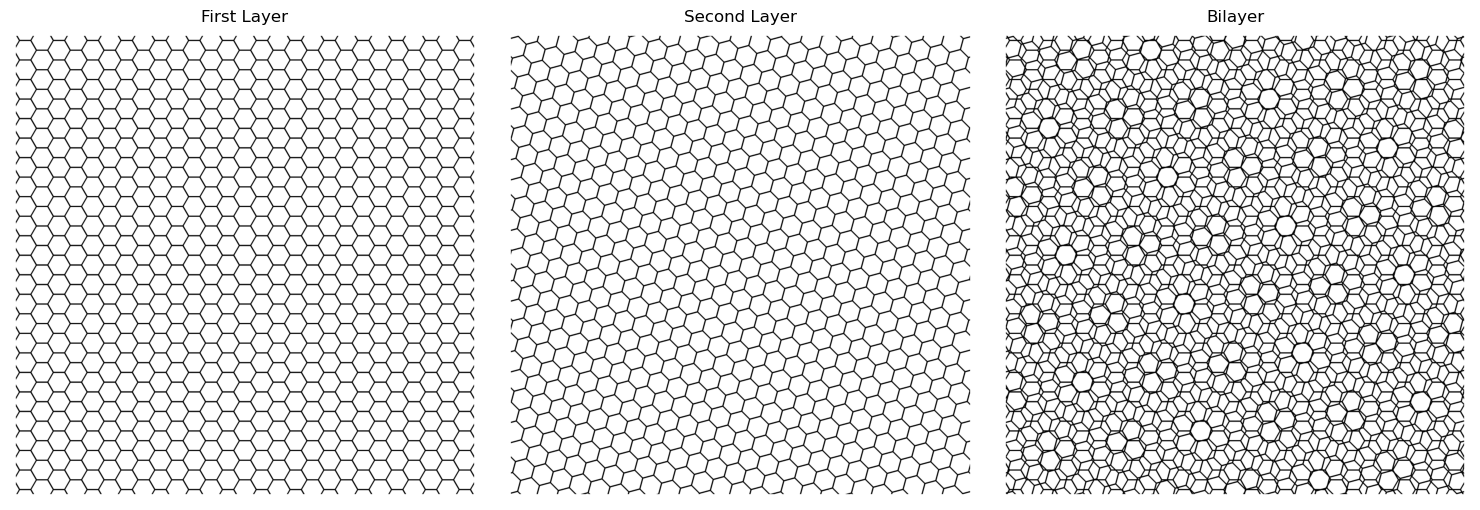

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_first, cmap='gray')
axs[0].axis('off')
axs[0].set_title('First Layer')
axs[1].imshow(img_second, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Second Layer')
axs[2].imshow(img_bilayer, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Bilayer')
plt.tight_layout()


In [127]:
fft1 = np.fft.fftshift(np.fft.fft2(img_first))
fft2 = np.fft.fftshift(np.fft.fft2(img_second))
fft_bi = np.fft.fftshift(np.fft.fft2(img_bilayer))

moire = fft_bi - fft1 - fft2

In [128]:
mag_first = np.abs(fft1)
mag_second = np.abs(fft2)
mag_bi = np.abs(fft_bi)
mag_moire = np.abs(moire)

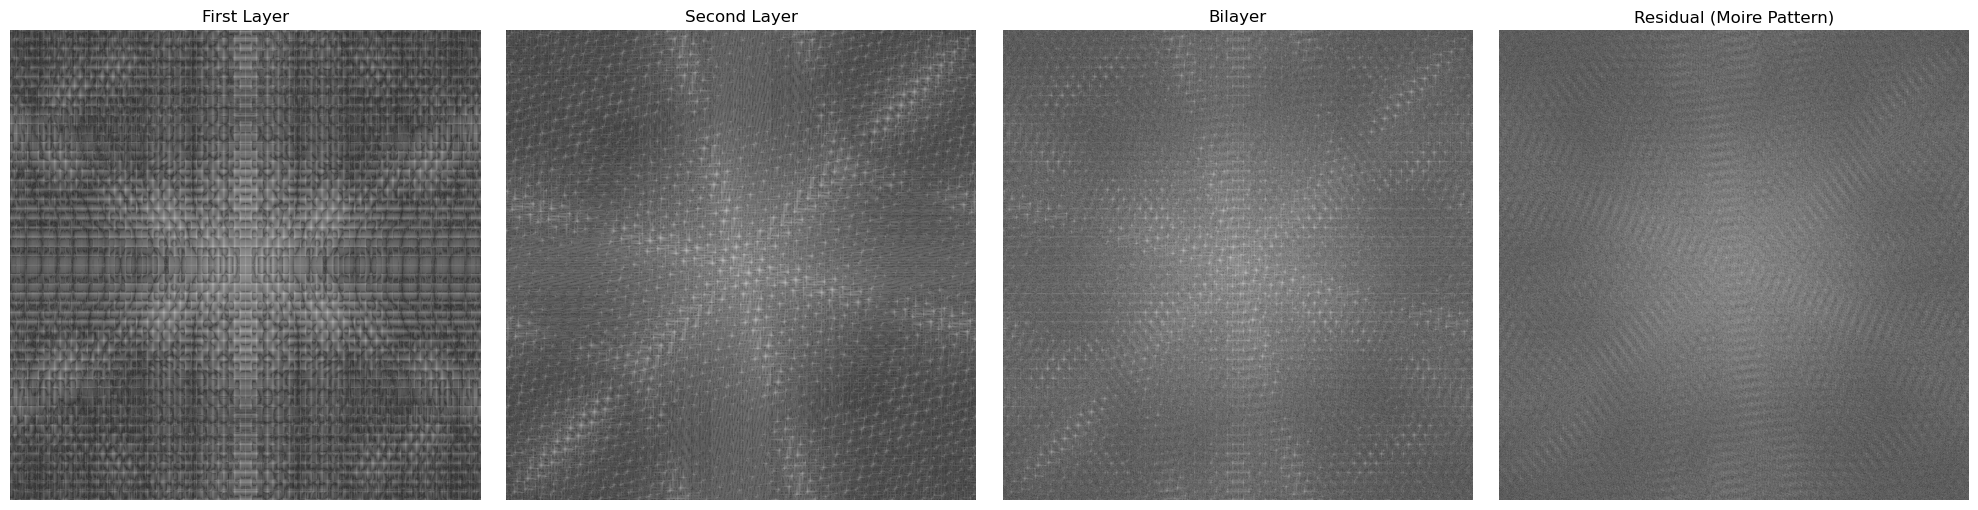

In [129]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(np.log1p(mag_first), cmap='gray')
axs[0].axis('off')
axs[0].set_title('First Layer')
axs[1].imshow(np.log1p(mag_second), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Second Layer')
axs[2].imshow(np.log1p(mag_bi), cmap='gray')
axs[2].axis('off')
axs[2].set_title('Bilayer')
axs[3].imshow(np.log1p(mag_moire), cmap='gray')
axs[3].axis('off')
axs[3].set_title('Residual (Moire Pattern)')
plt.tight_layout()

In [130]:
moire_pattern = np.fft.ifft2(np.fft.ifftshift(moire))
moire_pattern = np.abs(moire_pattern)

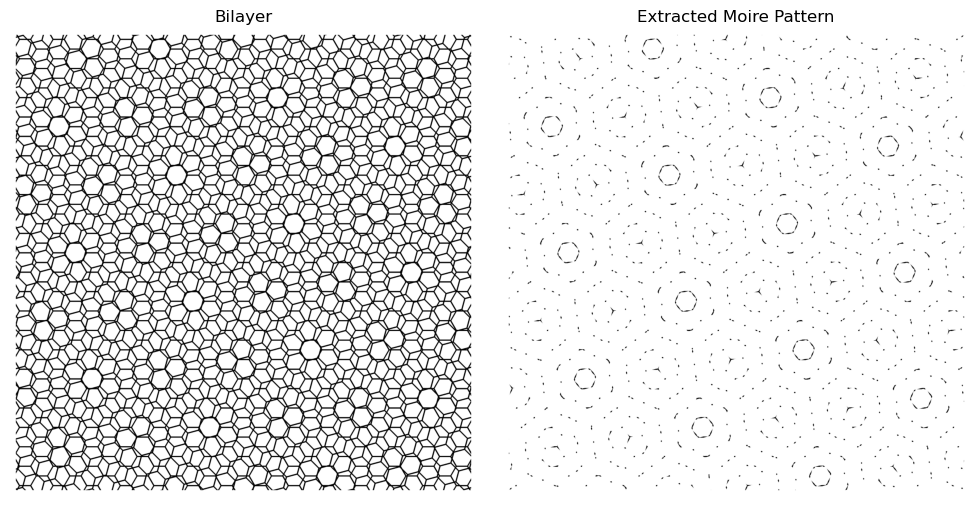

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_bilayer, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Bilayer')
ax[1].imshow(moire_pattern, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Extracted Moire Pattern')
plt.tight_layout()

In [132]:

# # Plot FFT magnitude spectrum
# plt.figure(figsize=(8, 6))
# plt.imshow(np.log1p(magnitude_spectrum), cmap='inferno')
# plt.title("FFT of Twisted Bilayer Graphene Image")
# plt.colorbar(label='Log Magnitude')
# # plt.axis('off')
# plt.show()

In [133]:
# plot_graphene_layers(50, 50, angle=10)

In [134]:
# plot_graphene_layers(50, 50, angle=30)

In [135]:
# plot_graphene_layers(50, 50, angle=45)